In [1]:
#supress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',40)
pd.set_option('display.max_rows',200)

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import xticks
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

# Step 1: Reading and Understanding the data

In [3]:
score=pd.read_csv(r"Leads.csv")
score.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Here we can see that many columns are having the value 'Select' which basically meant that that user hasn't chose any option and by default the field has been populated by value 'Select'. So we will be treating it as NaN value.

In [4]:
score=pd.read_csv(r"Leads.csv", na_values="Select")
score.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
score.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
score.shape

(9240, 37)

In [8]:
#Drop duplicate rows if any
score = score.drop_duplicates()
score.shape

(9240, 37)

# Step 2: Data Cleaning

In [9]:
# summing up the missing values (column-wise)
score.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [10]:
# Percentage of missing values column-wise
round(score.isnull().sum()/len(score.index)*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [11]:
score.shape

(9240, 37)

In [12]:
# Drop irrelevant columns with more than 35% null values
cols_to_drop = ['Specialization','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Quality'\
               ,'How did you hear about X Education','Lead Profile','City','Tags']
score = score.drop(cols_to_drop,axis=1)
score.shape

(9240, 27)

In [13]:
round(score.isnull().sum()/len(score.index)*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [14]:
# Checking unique values in each column
score.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                   

In [15]:
# Dropping columns with just 1 value throughout
cols_to_drop = ['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content'\
               ,'I agree to pay the amount through cheque']
score = score.drop(cols_to_drop,axis=1)
score.shape

(9240, 22)

### Checking if any categorical column is highly skewed

In [16]:
round(score['Lead Origin'].value_counts()/len(score.index)*100,2)

Landing Page Submission    52.88
API                        38.74
Lead Add Form               7.77
Lead Import                 0.60
Quick Add Form              0.01
Name: Lead Origin, dtype: float64

In [17]:
round(score['Lead Source'].value_counts()/len(score.index)*100,2)

Google               31.04
Direct Traffic       27.52
Olark Chat           18.99
Organic Search       12.49
Reference             5.78
Welingak Website      1.54
Referral Sites        1.35
Facebook              0.60
bing                  0.06
google                0.05
Click2call            0.04
Press_Release         0.02
Live Chat             0.02
Social Media          0.02
blog                  0.01
welearnblog_Home      0.01
Pay per Click Ads     0.01
testone               0.01
WeLearn               0.01
youtubechannel        0.01
NC_EDM                0.01
Name: Lead Source, dtype: float64

In [18]:
round(score['Do Not Email'].value_counts()/len(score.index)*100,2)

No     92.06
Yes     7.94
Name: Do Not Email, dtype: float64

In [19]:
round(score['Do Not Call'].value_counts()/len(score.index)*100,2)

No     99.98
Yes     0.02
Name: Do Not Call, dtype: float64

In [20]:
round(score['Last Activity'].value_counts()/len(score.index)*100,2)

Email Opened                    37.20
SMS Sent                        29.71
Olark Chat Conversation         10.53
Page Visited on Website          6.93
Converted to Lead                4.63
Email Bounced                    3.53
Email Link Clicked               2.89
Form Submitted on Website        1.26
Unreachable                      1.01
Unsubscribed                     0.66
Had a Phone Conversation         0.32
Approached upfront               0.10
View in browser link Clicked     0.06
Email Marked Spam                0.02
Email Received                   0.02
Resubscribed to emails           0.01
Visited Booth in Tradeshow       0.01
Name: Last Activity, dtype: float64

In [21]:
round(score['Country'].value_counts()/len(score.index)*100,2)

India                   70.26
United States            0.75
United Arab Emirates     0.57
Singapore                0.26
Saudi Arabia             0.23
United Kingdom           0.16
Australia                0.14
Qatar                    0.11
Hong Kong                0.08
Bahrain                  0.08
France                   0.06
Oman                     0.06
unknown                  0.05
Nigeria                  0.04
Kuwait                   0.04
South Africa             0.04
Germany                  0.04
Canada                   0.04
Sweden                   0.03
Belgium                  0.02
Ghana                    0.02
Netherlands              0.02
Uganda                   0.02
Italy                    0.02
Asia/Pacific Region      0.02
China                    0.02
Bangladesh               0.02
Philippines              0.02
Russia                   0.01
Tanzania                 0.01
Kenya                    0.01
Liberia                  0.01
Sri Lanka                0.01
Switzerlan

In [22]:
round(score['What is your current occupation'].value_counts()/len(score.index)*100,2)

Unemployed              60.61
Working Professional     7.64
Student                  2.27
Other                    0.17
Housewife                0.11
Businessman              0.09
Name: What is your current occupation, dtype: float64

In [23]:
round(score['What matters most to you in choosing a course'].value_counts()/len(score.index)*100,2)

Better Career Prospects      70.65
Flexibility & Convenience     0.02
Other                         0.01
Name: What matters most to you in choosing a course, dtype: float64

In [24]:
round(score['Search'].value_counts()/len(score.index)*100,2)

No     99.85
Yes     0.15
Name: Search, dtype: float64

In [25]:
round(score['Newspaper Article'].value_counts()/len(score.index)*100,2)

No     99.98
Yes     0.02
Name: Newspaper Article, dtype: float64

In [26]:
round(score['X Education Forums'].value_counts()/len(score.index)*100,2)

No     99.99
Yes     0.01
Name: X Education Forums, dtype: float64

In [27]:
round(score['Newspaper'].value_counts()/len(score.index)*100,2)

No     99.99
Yes     0.01
Name: Newspaper, dtype: float64

In [28]:
round(score['Digital Advertisement'].value_counts()/len(score.index)*100,2)

No     99.96
Yes     0.04
Name: Digital Advertisement, dtype: float64

In [29]:
round(score['Through Recommendations'].value_counts()/len(score.index)*100,2)

No     99.92
Yes     0.08
Name: Through Recommendations, dtype: float64

In [30]:
round(score['A free copy of Mastering The Interview'].value_counts()/len(score.index)*100,2)

No     68.74
Yes    31.26
Name: A free copy of Mastering The Interview, dtype: float64

In [31]:
round(score['Last Notable Activity'].value_counts()/len(score.index)*100,2)

Modified                        36.87
Email Opened                    30.60
SMS Sent                        23.51
Page Visited on Website          3.44
Olark Chat Conversation          1.98
Email Link Clicked               1.87
Email Bounced                    0.65
Unsubscribed                     0.51
Unreachable                      0.35
Had a Phone Conversation         0.15
Email Marked Spam                0.02
Email Received                   0.01
Form Submitted on Website        0.01
Resubscribed to emails           0.01
Approached upfront               0.01
View in browser link Clicked     0.01
Name: Last Notable Activity, dtype: float64

In [32]:
# We can drop the following columns since most of the values are centered around a single option
cols_to_drop = ['Do Not Email','Do Not Call','Country','What is your current occupation','What matters most to you in choosing a course'\
               ,'Search','Newspaper Article','Newspaper','X Education Forums','Digital Advertisement','Through Recommendations']
score = score.drop(cols_to_drop,axis=1)
score.shape

(9240, 11)

In [33]:
# Dropping Prospect ID and Last Notable Activity since their substitutes are available in the data that is Lead Number and Last Activity respectively
score = score.drop(['Prospect ID','Last Notable Activity'],axis=1)
score.shape

(9240, 9)

In [34]:
round(score.isnull().sum()/len(score.index)*100,2)

Lead Number                               0.00
Lead Origin                               0.00
Lead Source                               0.39
Converted                                 0.00
TotalVisits                               1.48
Total Time Spent on Website               0.00
Page Views Per Visit                      1.48
Last Activity                             1.11
A free copy of Mastering The Interview    0.00
dtype: float64

### Dropping/Imputing missing values of categorical variables and grouping categories as 'Others' wherever required

In [35]:
# Drop Lead Source missing values and impute categories with low proportions in the data as Others 
score = score.dropna(subset = ['Lead Source'])
score['Lead Source'] = score['Lead Source'].replace(to_replace=['Welingak Website','Referral Sites','Facebook','bing','google','Click2call','Social Media','Press_Release',\
                                                                'Live Chat','youtubechannel','WeLearn','welearnblog_Home','NC_EDM','blog','testone','Pay per Click Ads'],value='Others')
score['Lead Source'].value_counts()

Google            2868
Direct Traffic    2543
Olark Chat        1755
Organic Search    1154
Reference          534
Others             350
Name: Lead Source, dtype: int64

In [36]:
round(score.isnull().sum()/len(score.index)*100,2)

Lead Number                               0.00
Lead Origin                               0.00
Lead Source                               0.00
Converted                                 0.00
TotalVisits                               1.41
Total Time Spent on Website               0.00
Page Views Per Visit                      1.41
Last Activity                             1.10
A free copy of Mastering The Interview    0.00
dtype: float64

In [37]:
# Drop Last Activity missing values and impute categories with low proportions in the data as Others
score = score.dropna(subset = ['Last Activity'])
score['Last Activity'] = score['Last Activity'].replace(to_replace=['Email Link Clicked','Form Submitted on Website',\
                                                                    'Unreachable','Unsubscribed','Had a Phone Conversation','Approached upfront',\
                                                                    'View in browser link Clicked','Email Received','Email Marked Spam',\
                                                                    'Resubscribed to emails','Visited Booth in Tradeshow'],value='Others')
score['Last Activity'].value_counts()

Email Opened               3432
SMS Sent                   2723
Olark Chat Conversation     973
Page Visited on Website     640
Others                      586
Converted to Lead           428
Email Bounced               321
Name: Last Activity, dtype: int64

In [38]:
round(score.isnull().sum()/len(score.index)*100,2)

Lead Number                               0.00
Lead Origin                               0.00
Lead Source                               0.00
Converted                                 0.00
TotalVisits                               0.32
Total Time Spent on Website               0.00
Page Views Per Visit                      0.32
Last Activity                             0.00
A free copy of Mastering The Interview    0.00
dtype: float64

In [39]:
score.shape

(9103, 9)

In [40]:
# Dropping missing values of columns
score = score.dropna(subset = ['TotalVisits'])
score = score.dropna(subset = ['Page Views Per Visit'])
score.shape

(9074, 9)

In [41]:
round(score.isnull().sum()/len(score.index)*100,2)

Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
A free copy of Mastering The Interview    0.0
dtype: float64

In [42]:
# Percentage of rows retained
round(100*9074/9240,2)

98.2

In [43]:
score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 9 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9074 non-null   int64  
 1   Lead Origin                             9074 non-null   object 
 2   Lead Source                             9074 non-null   object 
 3   Converted                               9074 non-null   int64  
 4   TotalVisits                             9074 non-null   float64
 5   Total Time Spent on Website             9074 non-null   int64  
 6   Page Views Per Visit                    9074 non-null   float64
 7   Last Activity                           9074 non-null   object 
 8   A free copy of Mastering The Interview  9074 non-null   object 
dtypes: float64(2), int64(3), object(4)
memory usage: 708.9+ KB


# Step 3: Data Visualisation

In [44]:
score.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,A free copy of Mastering The Interview
0,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,No
1,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,No
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Yes
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,No
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,No


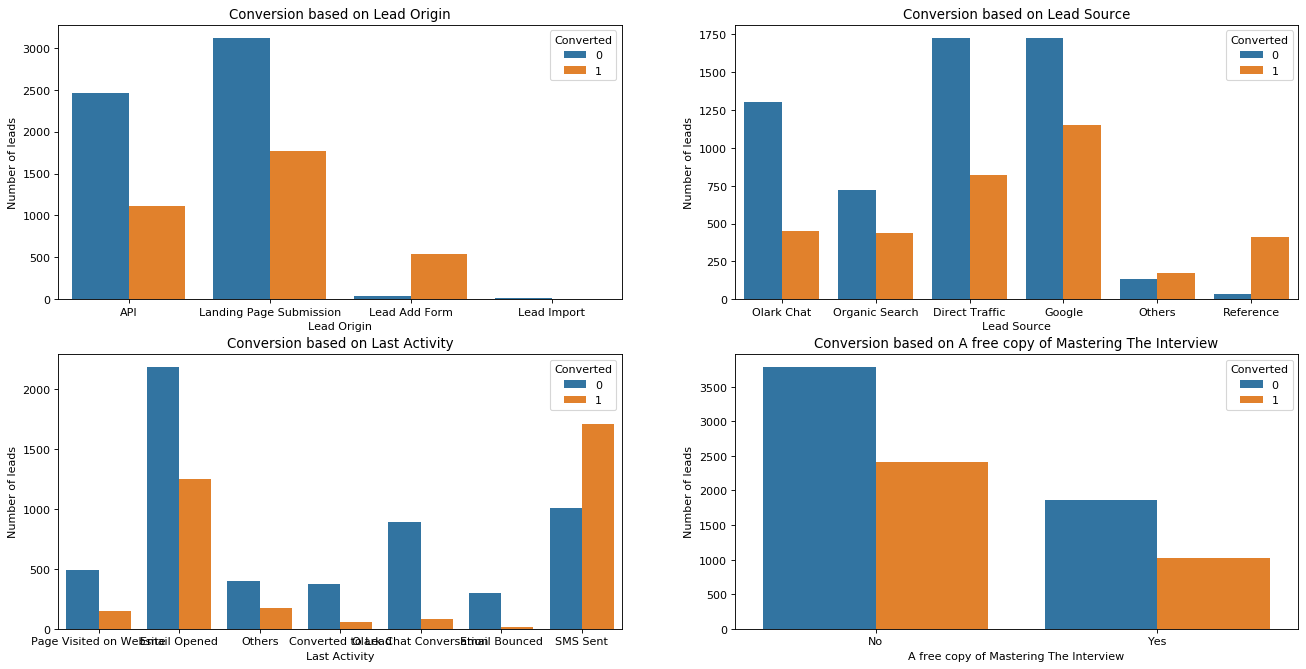

In [45]:
# Visualising categorical variables
cols = ['Lead Origin','Lead Source','Last Activity','A free copy of Mastering The Interview']
plt.figure(figsize=(20,10),dpi=80)
for i in range(len(cols)):
    plt.subplot(2,2,i+1)
    ax = sns.countplot(data=score,x=cols[i],hue='Converted')
    plt.title('Conversion based on {0}'.format(cols[i]))
    plt.ylabel('Number of leads')
    plt.xlabel('{0}'.format(cols[i]))
plt.show()

### Inferences:-
1. Lead Add Form has the highest coversion rate as the Lead Origin
2. Reference followed by Others has the highest coversion rate as the Lead Source
3. When Last Activity of customer was SMS Sent, coversion rate is the highest
4. Lead coversion rate is slightly higher when a free copy of Mastering The Interview is provided

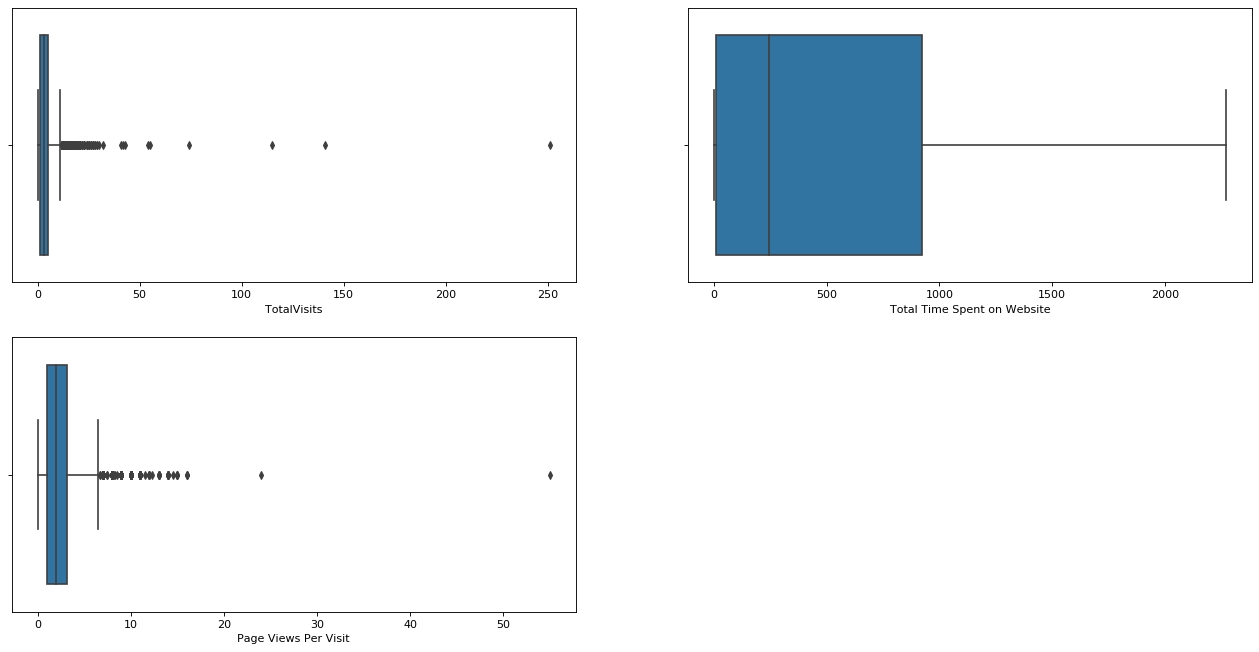

In [46]:
# Visualsing numerical variables
cols = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
plt.figure(figsize=(20,10),dpi=80)
for i in range(len(cols)):
    plt.subplot(2,2,i+1)
    sns.boxplot(x=score['{0}'.format(cols[i])])
plt.show()

In [47]:
# Checking for outliers statistically
score[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']].describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
95%,10.000000,1557.000000,6.000000
99%,17.000000,1839.000000,9.000000


### Inference- It can be seen from the above that outliers exists for columns TotalVisits and Page Views Per Visit since there is a huge change between 99 percentile and maximum value.

## Outlier Treatment

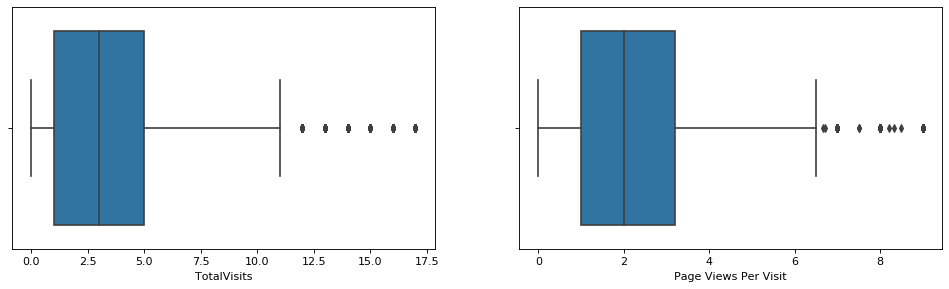

In [48]:
# Soft capping the outliers
def capping(col):
    upper = score[col].quantile(0.99)
    score[col][score[col]>=upper] = upper

cols = ['TotalVisits','Page Views Per Visit']

for i in cols:
    capping(i)

plt.figure(figsize=(15,4),dpi=80)
for i in range(len(cols)):
    plt.subplot(1,2,i+1)
    sns.boxplot(x=score['{0}'.format(cols[i])])
plt.show()

# Step 4: Data Preparation 

In [49]:
score.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,A free copy of Mastering The Interview
0,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,No
1,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,No
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Yes
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,No
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,No


In [50]:
# Mapping Yes to 1 and No to 0
score['A free copy of Mastering The Interview'] = score['A free copy of Mastering The Interview'].map({'Yes': 1, 'No': 0})
score.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,A free copy of Mastering The Interview
0,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,0
1,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,0
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,1
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,0
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,0


In [51]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
score1 = pd.get_dummies(score,columns=['Lead Origin', 'Lead Source','Last Activity'], drop_first=True)
score1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 20 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9074 non-null   int64  
 1   Converted                               9074 non-null   int64  
 2   TotalVisits                             9074 non-null   float64
 3   Total Time Spent on Website             9074 non-null   int64  
 4   Page Views Per Visit                    9074 non-null   float64
 5   A free copy of Mastering The Interview  9074 non-null   int64  
 6   Lead Origin_Landing Page Submission     9074 non-null   uint8  
 7   Lead Origin_Lead Add Form               9074 non-null   uint8  
 8   Lead Origin_Lead Import                 9074 non-null   uint8  
 9   Lead Source_Google                      9074 non-null   uint8  
 10  Lead Source_Olark Chat                  9074 non-null   uint

In [52]:
score.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,A free copy of Mastering The Interview
0,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,0
1,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,0
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,1
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,0
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,0


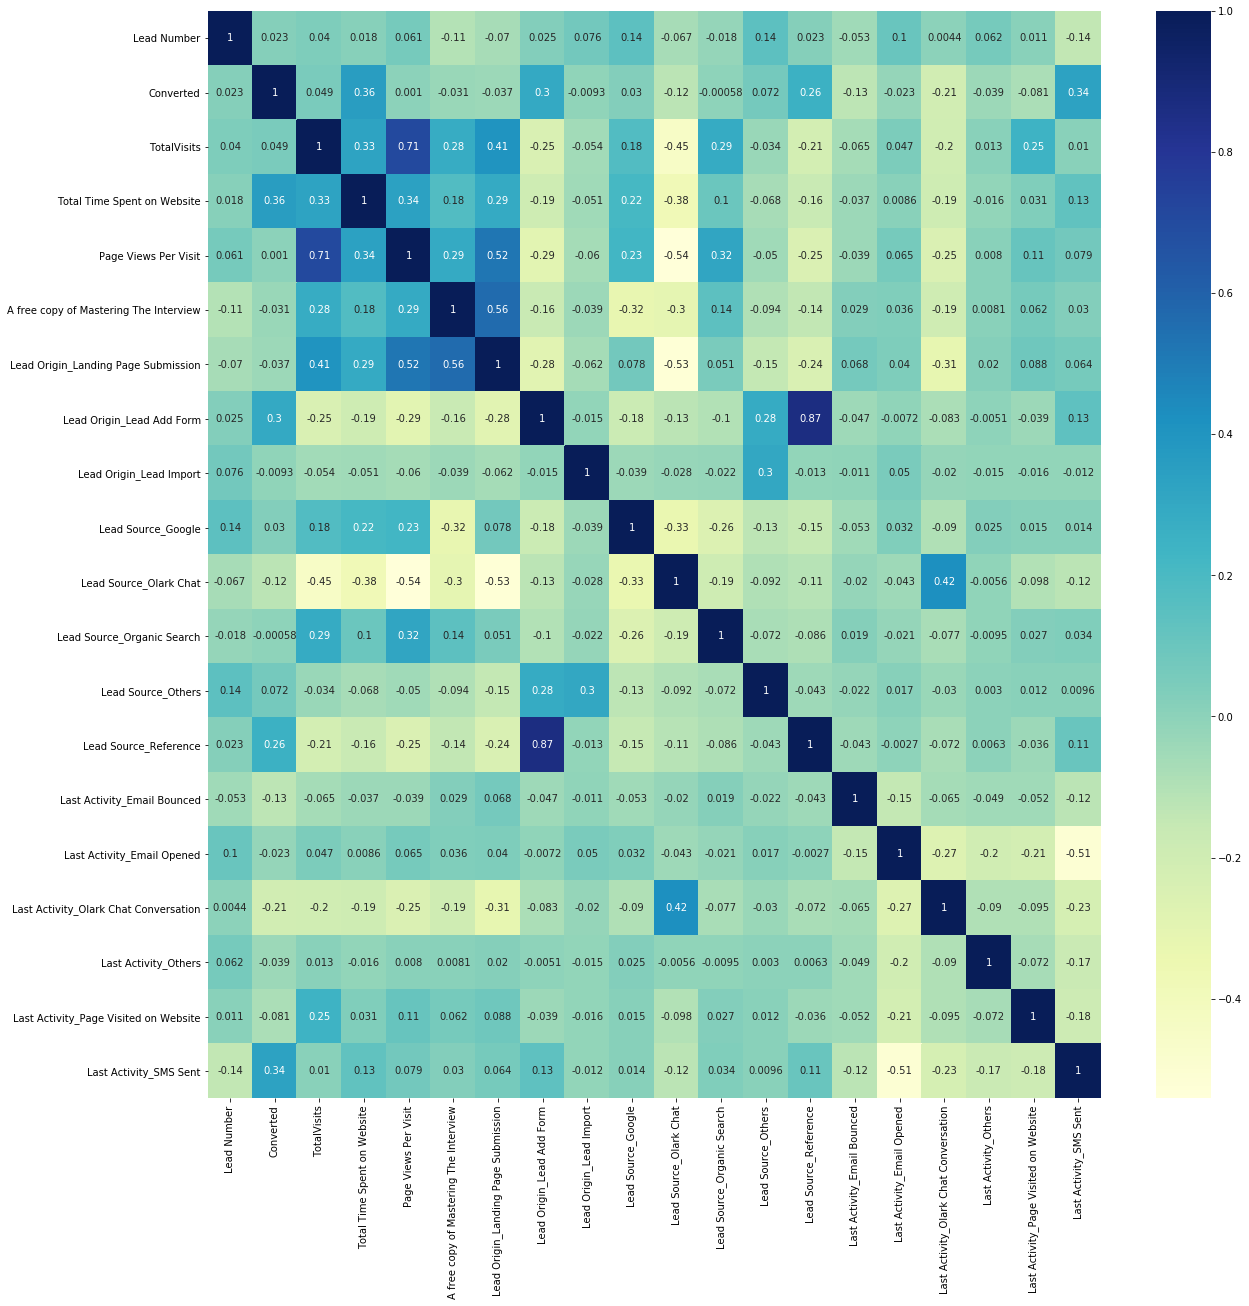

In [53]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,20))
sns.heatmap(score1.corr(),annot = True,cmap="YlGnBu")
plt.show()

In [54]:
score.corr()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview
Lead Number,1.000000,0.022830,0.039849,0.018360,0.061137,-0.106875
Converted,0.022830,1.000000,0.048849,0.359261,0.001005,-0.030860
TotalVisits,0.039849,0.048849,1.000000,0.328090,0.705080,0.279351
Total Time Spent on Website,0.018360,0.359261,0.328090,1.000000,0.341043,0.177435
Page Views Per Visit,0.061137,0.001005,0.705080,0.341043,1.000000,0.290307
A free copy of Mastering The Interview,-0.106875,-0.030860,0.279351,0.177435,0.290307,1.000000


# Step 5: Model Building

## Split the dataset into train and test

In [55]:
# Putting feature variable to X
X = score1.drop(['Converted','Lead Number'], axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Last Activity_Email Bounced,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent
0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,2.0,1428,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0


In [56]:
# Putting response variable to y
y = score['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [57]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Feature Scaling

In [58]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Last Activity_Email Bounced,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent
3009,-0.417238,-0.160255,-0.177298,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1012,-0.417238,-0.540048,-0.177298,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
9226,-1.034493,-0.888650,-1.183128,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4750,-0.417238,1.643304,-0.177298,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
7987,0.508645,2.017593,0.074159,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


### Running our First Training Model.

In [59]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2877.3
Date:                Mon, 07 Sep 2020   Deviance:                       5754.5
Time:                        20:52:52   Pearson chi2:                 6.58e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -2.3766      0.232    -10.239      0.000      -2.832      -1.922
TotalVisits                                0.2951      0.047      6.236      0.000       0.202       0.388
Total Time Spent on Website                1.1423      0.039     29.403      0.000       1.066       1.218
Page Views Per Visit                      -0.2001      0.053     -3.774      0.000      -0.304      -0.096
A free copy of Mastering The Interview    -0.0270      0.100     -0.270      0.787      -0.223       0.169
Lead Origin_Landing Page Submission       -0.1497      0.100     -1.499      0.134      -0.346       0.046
Lead Origin_Lead Add Form                  5.0982      0.595      8.570      0.000       3.932       6.264
Lead Origin_Lead Import                    1.5801      0.516      3.065      0.002       0.570       2.591
Lead Source_Google                         0.3142      0.106      2.956      0.003       0.106       0.523
Lead Source_Olark Chat                     1.2948      0.153      8.438      0.000       0.994       1.596
Lead Source_Organic Search                 0.0865      0.122      0.710      0.478      -0.152       0.325
Lead Source_Others                        -0.0314      0.283     -0.111      0.911      -0.586       0.523
Lead Source_Reference                     -0.8623      0.631     -1.366      0.172      -2.099       0.375
Last Activity_Email Bounced               -1.0668      0.414     -2.579      0.010      -1.878      -0.256
Last Activity_Email Opened                 1.2047      0.215      5.616      0.000       0.784       1.625
Last Activity_Olark Chat Conversation     -0.4855      0.260     -1.871      0.061      -0.994       0.023
Last Activity_Others                       1.0407      0.244      4.263      0.000       0.562       1.519
Last Activity_Page Visited on Website      0.4132      0.251      1.646      0.100      -0.079       0.905
Last Activity_SMS Sent                     2.2919      0.215     10.638      0.000       1.870       2.714
==========================================================================================================
"""

## Feature Selection Using RFE

In [60]:
logreg = LogisticRegression()

In [61]:
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [62]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('A free copy of Mastering The Interview', False, 4),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 3),
 ('Lead Source_Others', True, 1),
 ('Lead Source_Reference', False, 2),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', True, 1),
 ('Last Activity_SMS Sent', True, 1)]

In [63]:
col = X_train.columns[rfe.support_]
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Others',
       'Last Activity_Email Bounced', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent'],
      dtype='object')

## Assessing the model with StatsModels

In [64]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2878.7
Date:                Mon, 07 Sep 2020   Deviance:                       5757.5
Time:                        20:52:53   Pearson chi2:                 6.55e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.3527      0.219    -10.753      0.000      -2.782      -1.924
TotalVisits                               0.2975      0.047      6.368      0.000       0.206       0.389
Total Time Spent on Website               1.1423      0.039     29.427      0.000       1.066       1.218
Page Views Per Visit                     -0.1932      0.052     -3.731      0.000      -0.295      -0.092
Lead Origin_Landing Page Submission      -0.1721      0.089     -1.935      0.053      -0.346       0.002
Lead Origin_Lead Add Form                 4.3563      0.233     18.736      0.000       3.901       4.812
Lead Origin_Lead Import                   1.4114      0.496      2.844      0.004       0.439       2.384
Lead Source_Google                        0.3061      0.078      3.925      0.000       0.153       0.459
Lead Source_Olark Chat                    1.2880      0.142      9.087      0.000       1.010       1.566
Lead Source_Others                        0.1311      0.232      0.566      0.571      -0.323       0.585
Last Activity_Email Bounced              -1.0457      0.411     -2.546      0.011      -1.851      -0.241
Last Activity_Email Opened                1.1953      0.214      5.578      0.000       0.775       1.615
Last Activity_Olark Chat Conversation    -0.4947      0.259     -1.908      0.056      -1.003       0.013
Last Activity_Others                      1.0271      0.244      4.209      0.000       0.549       1.505
Last Activity_Page Visited on Website     0.4001      0.251      1.596      0.110      -0.091       0.891
Last Activity_SMS Sent                    2.2875      0.215     10.622      0.000       1.865       2.710
=========================================================================================================
"""

In [65]:
# Getting the predicted values on train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.167632
1012    0.013689
9226    0.532053
4750    0.824886
7987    0.900629
1281    0.770229
2880    0.106654
4971    0.908794
7536    0.844876
1248    0.857541
dtype: float64

In [66]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.16763237, 0.01368908, 0.53205259, 0.82488563, 0.90062931,
       0.77022925, 0.10665415, 0.9087938 , 0.84487586, 0.85754079])

In [67]:
y_train_pred_final = pd.DataFrame({'Convert':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Convert,Convert_Prob,LeadID
0,0,0.167632,3009
1,0,0.013689,1012
2,0,0.532053,9226
3,1,0.824886,4750
4,1,0.900629,7987


### Creating new column 'predicted' with 1 if Convert_Prob > 0.5 else 0

In [68]:
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Convert,Convert_Prob,LeadID,predicted
0,0,0.167632,3009,0
1,0,0.013689,1012,0
2,0,0.532053,9226,1
3,1,0.824886,4750,1
4,1,0.900629,7987,1


In [69]:
# Confusion Matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final.predicted )
print(confusion)

[[3419  486]
 [ 770 1676]]


In [70]:
# Accuracy
print(metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.predicted))

0.8022358683671863


In [71]:
# Sensitivity
print(confusion[1][1]/(confusion[1][1]+confusion[1][0]))

0.6852003270645952


### Dropping Lead Source_Others since p-value > 0.05 

In [72]:
col = col.drop('Lead Source_Others', 1)
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Last Activity_Email Bounced',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activity_Page Visited on Website',
       'Last Activity_SMS Sent'],
      dtype='object')

In [73]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2878.9
Date:                Mon, 07 Sep 2020   Deviance:                       5757.8
Time:                        20:52:53   Pearson chi2:                 6.55e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.3430      0.218    -10.742      0.000      -2.771      -1.916
TotalVisits                               0.2977      0.047      6.370      0.000       0.206       0.389
Total Time Spent on Website               1.1417      0.039     29.428      0.000       1.066       1.218
Page Views Per Visit                     -0.1917      0.052     -3.707      0.000      -0.293      -0.090
Lead Origin_Landing Page Submission      -0.1790      0.088     -2.032      0.042      -0.352      -0.006
Lead Origin_Lead Add Form                 4.3781      0.230     19.051      0.000       3.928       4.828
Lead Origin_Lead Import                   1.5336      0.447      3.430      0.001       0.657       2.410
Lead Source_Google                        0.2998      0.077      3.884      0.000       0.149       0.451
Lead Source_Olark Chat                    1.2789      0.141      9.082      0.000       1.003       1.555
Last Activity_Email Bounced              -1.0437      0.410     -2.544      0.011      -1.848      -0.239
Last Activity_Email Opened                1.1958      0.214      5.580      0.000       0.776       1.616
Last Activity_Olark Chat Conversation    -0.4922      0.259     -1.899      0.058      -1.000       0.016
Last Activity_Others                      1.0302      0.244      4.223      0.000       0.552       1.508
Last Activity_Page Visited on Website     0.4028      0.251      1.607      0.108      -0.088       0.894
Last Activity_SMS Sent                    2.2868      0.215     10.619      0.000       1.865       2.709
=========================================================================================================
"""

In [74]:
# Getting the predicted values on train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.168065
1012    0.013755
9226    0.531690
4750    0.824998
7987    0.900725
1281    0.769343
2880    0.106466
4971    0.909227
7536    0.845363
1248    0.857620
dtype: float64

In [75]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.1680648 , 0.01375519, 0.53168956, 0.82499821, 0.90072513,
       0.76934305, 0.10646648, 0.90922729, 0.8453633 , 0.85761967])

In [76]:
y_train_pred_final = pd.DataFrame({'Convert':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Convert,Convert_Prob,LeadID
0,0,0.168065,3009
1,0,0.013755,1012
2,0,0.531690,9226
3,1,0.824998,4750
4,1,0.900725,7987


### Creating new column 'predicted' with 1 if Convert_Prob > 0.5 else 0

In [77]:
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Convert,Convert_Prob,LeadID,predicted
0,0,0.168065,3009,0
1,0,0.013755,1012,0
2,0,0.531690,9226,1
3,1,0.824998,4750,1
4,1,0.900725,7987,1


In [78]:
# Confusion Matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final.predicted )
print(confusion)

[[3420  485]
 [ 771 1675]]


In [79]:
# Accuracy
print(metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.predicted))

0.8022358683671863


In [80]:
# Sensitivity
print(confusion[1][1]/(confusion[1][1]+confusion[1][0]))

0.6847914963205233


In [81]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Landing Page Submission,3.43
7,Lead Source_Olark Chat,3.35
9,Last Activity_Email Opened,3.16
13,Last Activity_SMS Sent,2.87
2,Page Views Per Visit,2.63
0,TotalVisits,2.22
4,Lead Origin_Lead Add Form,1.86
6,Lead Source_Google,1.80
10,Last Activity_Olark Chat Conversation,1.80
12,Last Activity_Page Visited on Website,1.47


### Dropping Last Activity_Page Visited on Website p-value > 0.05

In [82]:
col = col.drop('Last Activity_Page Visited on Website', 1)
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Last Activity_Email Bounced',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activity_SMS Sent'],
      dtype='object')

In [83]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2880.2
Date:                Mon, 07 Sep 2020   Deviance:                       5760.4
Time:                        20:52:54   Pearson chi2:                 6.55e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.0815      0.138    -15.116      0.000      -2.351      -1.812
TotalVisits                               0.3142      0.046      6.866      0.000       0.225       0.404
Total Time Spent on Website               1.1419      0.039     29.443      0.000       1.066       1.218
Page Views Per Visit                     -0.1918      0.052     -3.704      0.000      -0.293      -0.090
Lead Origin_Landing Page Submission      -0.1770      0.088     -2.011      0.044      -0.350      -0.004
Lead Origin_Lead Add Form                 4.4092      0.229     19.247      0.000       3.960       4.858
Lead Origin_Lead Import                   1.5595      0.447      3.490      0.000       0.684       2.435
Lead Source_Google                        0.3043      0.077      3.946      0.000       0.153       0.455
Lead Source_Olark Chat                    1.3067      0.140      9.340      0.000       1.033       1.581
Last Activity_Email Bounced              -1.3091      0.373     -3.509      0.000      -2.040      -0.578
Last Activity_Email Opened                0.9236      0.124      7.452      0.000       0.681       1.167
Last Activity_Olark Chat Conversation    -0.7655      0.191     -4.008      0.000      -1.140      -0.391
Last Activity_Others                      0.7570      0.170      4.464      0.000       0.425       1.089
Last Activity_SMS Sent                    2.0163      0.127     15.881      0.000       1.767       2.265
=========================================================================================================
"""

In [84]:
# Getting the predicted values on train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.165898
1012    0.013635
9226    0.532103
4750    0.823055
7987    0.900905
1281    0.769544
2880    0.105876
4971    0.910411
7536    0.845409
1248    0.855983
dtype: float64

In [85]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.16589813, 0.01363466, 0.53210332, 0.82305516, 0.90090547,
       0.76954392, 0.10587598, 0.91041129, 0.84540906, 0.85598255])

In [86]:
y_train_pred_final = pd.DataFrame({'Convert':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Convert,Convert_Prob,LeadID
0,0,0.165898,3009
1,0,0.013635,1012
2,0,0.532103,9226
3,1,0.823055,4750
4,1,0.900905,7987


### Creating new column 'predicted' with 1 if Convert_Prob > 0.5 else 0

In [87]:
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Convert,Convert_Prob,LeadID,predicted
0,0,0.165898,3009,0
1,0,0.013635,1012,0
2,0,0.532103,9226,1
3,1,0.823055,4750,1
4,1,0.900905,7987,1


In [88]:
# Confusion Matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final.predicted )
print(confusion)

[[3418  487]
 [ 775 1671]]


In [89]:
# Accuracy
print(metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.predicted))

0.8012911352542906


In [90]:
# Sensitivity
print(confusion[1][1]/(confusion[1][1]+confusion[1][0]))

0.6831561733442355


In [91]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Lead Source_Olark Chat,2.90
3,Lead Origin_Landing Page Submission,2.77
2,Page Views Per Visit,2.63
9,Last Activity_Email Opened,2.57
12,Last Activity_SMS Sent,2.38
0,TotalVisits,2.08
10,Last Activity_Olark Chat Conversation,1.68
4,Lead Origin_Lead Add Form,1.66
6,Lead Source_Google,1.65
1,Total Time Spent on Website,1.30


### All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only.

In [92]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [93]:
# Let's see the sensitivity of our final logistic regression model
TP / float(TP+FN)

0.6831561733442355

In [94]:
# Let us calculate specificity
TN / float(TN+FP)

0.8752880921895007

In [95]:
# positive predictive value 
print (TP / float(TP+FP))

0.7743280815569972


In [96]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8151681373718102


In [97]:
print(classification_report(y_train_pred_final.Convert, y_train_pred_final.predicted))

              precision    recall  f1-score   support

           0       0.82      0.88      0.84      3905
           1       0.77      0.68      0.73      2446

    accuracy                           0.80      6351
   macro avg       0.79      0.78      0.79      6351
weighted avg       0.80      0.80      0.80      6351



### So it can be seen that with a cutoff value of 0.5 the accuracy is coming to 82% and sensitivity to 68%.

## Step 6: Finding Optimal Cut-Off Point

### Plotting the ROC Curve

In [98]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [99]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Convert, y_train_pred_final.Convert_Prob, drop_intermediate = False )

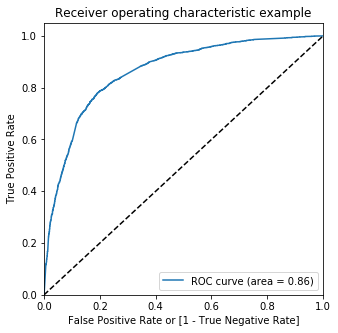

In [100]:
draw_roc(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)

In [101]:
# Finding Optimal Cutoff Point
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Convert,Convert_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.165898,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.013635,1012,0,1,0,0,0,0,0,0,0,0,0
2,0,0.532103,9226,1,1,1,1,1,1,1,0,0,0,0
3,1,0.823055,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.900905,7987,1,1,1,1,1,1,1,1,1,1,1


In [102]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.578492  0.974244  0.330602
0.2   0.2  0.695953  0.926002  0.551857
0.3   0.3  0.777200  0.829518  0.744430
0.4   0.4  0.799244  0.748978  0.830730
0.5   0.5  0.801291  0.683156  0.875288
0.6   0.6  0.771375  0.543336  0.914213
0.7   0.7  0.753582  0.455846  0.940077
0.8   0.8  0.726185  0.346280  0.964149
0.9   0.9  0.670918  0.164759  0.987964


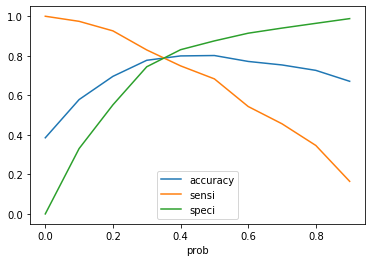

In [103]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [104]:
# Optimal threshold
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.36511856289431766

In [105]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)

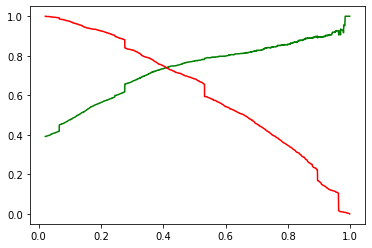

In [106]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Let's take the cutoff as 0.35 and check the metrics

In [107]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Convert_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head(10)

,Convert,Convert_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.165898,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.013635,1012,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.532103,9226,1,1,1,1,1,1,1,0,0,0,0,1
3,1,0.823055,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.900905,7987,1,1,1,1,1,1,1,1,1,1,1,1
5,1,0.769544,1281,1,1,1,1,1,1,1,1,1,0,0,1
6,0,0.105876,2880,0,1,1,0,0,0,0,0,0,0,0,0
7,1,0.910411,4971,1,1,1,1,1,1,1,1,1,1,1,1
8,1,0.845409,7536,1,1,1,1,1,1,1,1,1,1,0,1
9,0,0.855983,1248,1,1,1,1,1,1,1,1,1,1,0,1


In [108]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.final_predicted)

0.7921587151629664

In [109]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final.final_predicted )
confusion2

array([[3097,  808],
       [ 512, 1934]], dtype=int64)

In [110]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [111]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7906786590351594

In [112]:
# Let us calculate specificity
TN / float(TN+FP)

0.7930857874519847

In [113]:
#Precision
precision_score(y_train_pred_final.Convert, y_train_pred_final.final_predicted)

0.7053245805981035

In [114]:
#Recall
recall_score(y_train_pred_final.Convert, y_train_pred_final.final_predicted)

0.7906786590351594

### Hence with cutoff value 0.35 we can see that we are getting a good model with accuracy 79% and sensitivity 79%. 

## Step 7: Making Predictions On Test Set

In [115]:
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Last Activity_Email Bounced,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent
3271,4.0,157,4.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1490,5.0,1513,5.0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0
7936,2.0,74,2.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4216,0.0,0,0.0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0
3830,8.0,164,8.0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0


In [116]:
y_test.head()

3271    0
1490    1
7936    0
4216    1
3830    0
Name: Converted, dtype: int64

In [117]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test = X_test[col]
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Last Activity_Email Bounced,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent
3271,0.200018,-0.600595,0.828532,0,0,0,1,0,0,1,0,0,0
1490,0.508645,1.887326,1.331447,1,0,0,0,0,0,1,0,0,0
7936,-0.417238,-0.752879,-0.177298,0,0,0,1,0,0,1,0,0,0
4216,-1.034493,-0.888650,-1.183128,0,1,0,0,0,0,1,0,0,0
3830,1.434528,-0.587751,2.840192,1,0,0,0,0,0,1,0,0,0


In [118]:
# Getting predicted values on test set
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

3271    0.163084
1490    0.673664
7936    0.140586
4216    0.894582
3830    0.109105
1800    0.155543
6507    0.314529
4821    0.265443
4223    0.961987
4714    0.532103
dtype: float64

In [119]:
y_test_pred = y_test_pred.values.reshape(-1)
y_test_pred[:10]

array([0.16308412, 0.67366362, 0.14058594, 0.89458195, 0.10910542,
       0.15554333, 0.31452865, 0.26544264, 0.96198711, 0.53210332])

In [120]:
y_test_pred_final = pd.DataFrame({'Convert':y_test.values, 'Convert_Prob':y_test_pred})
y_test_pred_final['LeadID'] = y_test.index
y_test_pred_final.head()

,Convert,Convert_Prob,LeadID
0,0,0.163084,3271
1,1,0.673664,1490
2,0,0.140586,7936
3,1,0.894582,4216
4,0,0.109105,3830


### Creating new column 'predicted' with 1 if Convert_Prob > 0.35 else 0

In [121]:
y_test_pred_final['predicted'] = y_test_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.35 else 0)

# Let's see the head
y_test_pred_final.head()

,Convert,Convert_Prob,LeadID,predicted
0,0,0.163084,3271,0
1,1,0.673664,1490,1
2,0,0.140586,7936,0
3,1,0.894582,4216,1
4,0,0.109105,3830,0


In [122]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_test_pred_final.Convert, y_test_pred_final.predicted)

0.7903048108703635

In [123]:
confusion2 = metrics.confusion_matrix(y_test_pred_final.Convert, y_test_pred_final.predicted )
confusion2

array([[1384,  350],
       [ 221,  768]], dtype=int64)

In [124]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [125]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7765419615773509

In [126]:
# Let us calculate specificity
TN / float(TN+FP)

0.798154555940023

In [127]:
# Precision
precision_score(y_test_pred_final.Convert, y_test_pred_final.predicted)

0.6869409660107334

In [128]:
print(classification_report(y_test_pred_final.Convert, y_test_pred_final.predicted))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83      1734
           1       0.69      0.78      0.73       989

    accuracy                           0.79      2723
   macro avg       0.77      0.79      0.78      2723
weighted avg       0.80      0.79      0.79      2723



### So with the model that we built, it is having a good fitting on the test set also. Accuracy is 79% and Sensitivity is 78%. This was when we took the cutoff as 0.35.

## Step 8: Calculate Lead Score on Train and Test Data

### Calculate lead score on train data

In [129]:
# Inspecting final predicted train dataframe
train_lead_score = y_train_pred_final[['LeadID','Convert_Prob']]
train_lead_score.head()

,LeadID,Convert_Prob
0,3009,0.165898
1,1012,0.013635
2,9226,0.532103
3,4750,0.823055
4,7987,0.900905


In [130]:
train_lead_score['Lead_Score'] = round(y_train_pred_final['Convert_Prob']*100,0)
train_lead_score.head()

,LeadID,Convert_Prob,Lead_Score
0,3009,0.165898,17.0
1,1012,0.013635,1.0
2,9226,0.532103,53.0
3,4750,0.823055,82.0
4,7987,0.900905,90.0


### Calculate lead score on test data

In [131]:
# Inspecting final predicted test dataframe
test_lead_score = y_test_pred_final[['LeadID','Convert_Prob']]
test_lead_score.head()

,LeadID,Convert_Prob
0,3271,0.163084
1,1490,0.673664
2,7936,0.140586
3,4216,0.894582
4,3830,0.109105


In [132]:
test_lead_score['Lead_Score'] = round(y_test_pred_final['Convert_Prob']*100,0)
test_lead_score.head()

,LeadID,Convert_Prob,Lead_Score
0,3271,0.163084,16.0
1,1490,0.673664,67.0
2,7936,0.140586,14.0
3,4216,0.894582,89.0
4,3830,0.109105,11.0


### Concatenate test and train data to get lead scores for the complete dataset

In [133]:
print(train_lead_score.shape)
print(test_lead_score.shape)

(6351, 3)
(2723, 3)


In [134]:
lead_score_final = pd.concat([train_lead_score,test_lead_score],axis=0,join='outer')
lead_score_final.shape

(9074, 3)

In [135]:
lead_score_final.head()

,LeadID,Convert_Prob,Lead_Score
0,3009,0.165898,17.0
1,1012,0.013635,1.0
2,9226,0.532103,53.0
3,4750,0.823055,82.0
4,7987,0.900905,90.0


In [136]:
# Sorting in descending
lead_score_final.sort_values("Lead_Score",axis=0,ascending=False,inplace=True)
lead_score_final.head()

,LeadID,Convert_Prob,Lead_Score
5971,818,0.996096,100.0
1786,2011,0.998077,100.0
4776,6243,0.997889,100.0
3625,739,0.997088,100.0
5871,7219,0.996551,100.0


In [137]:
# Proportion of leads with a lead score of greater than 35
round(lead_score_final[lead_score_final['Lead_Score']>35].shape[0]/len(lead_score_final.index)*100,2)

42.14

In [138]:
# Proportion of leads with a lead score of greater than 50
round(lead_score_final[lead_score_final['Lead_Score']>50].shape[0]/len(lead_score_final.index)*100,2)

33.18

In [139]:
# Proportion of leads with a lead score of greater than 80
round(lead_score_final[lead_score_final['Lead_Score']>80].shape[0]/len(lead_score_final.index)*100,2)

14.75

## Hence, higher the score, higher is the chance for the lead to convert. And so the marketing team should focus on the customers with higher lead scores.